## 1. Exploratory Data Analysis for OCTMNIST
This notebook performs a full exploratory data analysis (EDA) on the **OCTMNIST** dataset from MedMNIST.

We will inspect dataset structure, visualize images, analyze pixel statistics, and understand class balance.

### Description:
**OCTMNIST** is derived from the **Retinal OCT (Optical Coherence Tomography) dataset** originally released by Kermany *et al.*, which contains cross-sectional images of the retina.  
These images are obtained using **Optical Coherence Tomography (OCT)** — a non-invasive imaging technique that provides high-resolution 3D views of retinal structures.  
The dataset’s goal is to classify **retinal diseases** based on OCT scan images.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from medmnist import OCTMNIST

sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (6, 4)

## 2. Load Dataset

In [10]:
train_data = OCTMNIST(split='train', download=True)
val_data   = OCTMNIST(split='val', download=True)
test_data  = OCTMNIST(split='test', download=True)

x_train = train_data.imgs
y_train = train_data.labels.flatten()

x_val = val_data.imgs
y_val = val_data.labels.flatten()

x_test = test_data.imgs
y_test = test_data.labels.flatten()

# Combine all labels to check number of unique classes
all_labels = np.concatenate([y_train, y_val, y_test])
num_classes = len(np.unique(all_labels))

print(f"Number of train images: {len(x_train)}")
print(f"Number of val images: {len(x_val)}")
print(f"Number of test images: {len(x_test)}")
print(f"Number of classes: {num_classes}")
print(f"Image size: {x_train[0].shape}")

Number of train images: 97477
Number of val images: 10832
Number of test images: 1000
Number of classes: 4
Image size: (28, 28)


## 3. Convert numeric labels to text

| Label | Disease | Description |
|:------:|:---------|:-------------|
| 0 | CNV (Choroidal Neovascularization) | Formation of abnormal new blood vessels under the retina; may cause vision loss |
| 1 | DME (Diabetic Macular Edema) | Swelling in the macula due to leaking blood vessels from diabetic retinopathy |
| 2 | DRUSEN | Yellow deposits under the retina, common in age-related macular degeneration (AMD) |
| 3 | NORMAL | Healthy retina without abnormal structures |

In [11]:
label_map = {
    0: "CNV",
    1: "DME",
    2: "Drusen",
    3: "Normal"
}
y_train_str = np.array([label_map[y] for y in y_train])
y_val_str   = np.array([label_map[y] for y in y_val])
y_test_str  = np.array([label_map[y] for y in y_test])

## 4. Visualize sample images

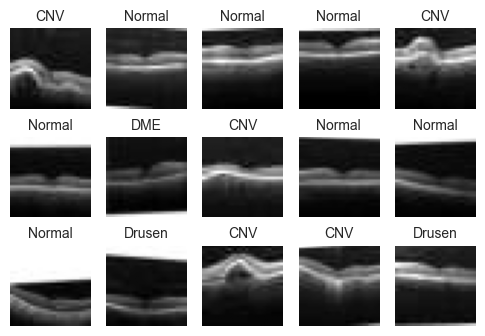

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(f"{y_train_str[i]}", size=10)
    ax.axis("off")
plt.show()

## 5. Class distribution

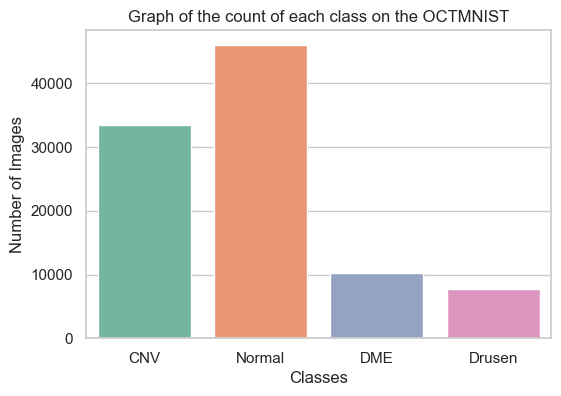

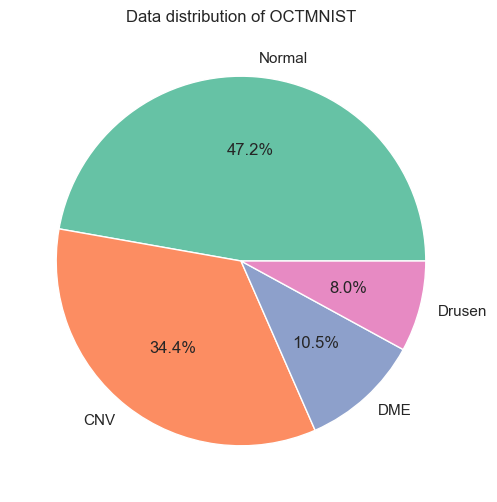

In [13]:
train_df = pd.DataFrame({"label": y_train_str})

sns.countplot(x="label", data=train_df, palette="Set2", hue="label", legend=False)
plt.title("Graph of the count of each class on the OCTMNIST")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(6, 6))
class_counts = train_df["label"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Data distribution of OCTMNIST")
plt.show()